# Covid-19 in 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import re
# import os
# import zipfile
# from io import BytesIO, StringIO
# import pprint
# from google.colab import drive
# import operator
# drive.mount('/content/drive')

https://covid.cdc.gov/covid-data-tracker/#datatracker-home
\
https://data.cdc.gov/Public-Health-Surveillance/NWSS-Public-SARS-CoV-2-Wastewater-Metric-Data/2ew6-ywp6/about_data
\
https://www.today.com/health/coronavirus/covid-wastewater-monitoring-rcna143158
\
https://www.usatoday.com/story/graphics/2024/01/16/covid-19-virus-wastewater-levels-increase/72189122007/


In [2]:
# !ls

In [20]:
df = pd.read_csv('NWSS_Public_SARS-CoV-2_Wastewater_Metric_Data_20240316.csv')
df['date_start'] = pd.to_datetime(df['date_start'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['first_sample_date'] = pd.to_datetime(df['first_sample_date'])
df.head()

,wwtp_jurisdiction,wwtp_id,reporting_jurisdiction,sample_location,sample_location_specify,key_plot_id,county_names,county_fips,population_served,date_start,date_end,ptc_15d,detect_prop_15d,percentile,sampling_prior,first_sample_date
0,South Carolina,2564,South Carolina,Treatment plant,NaN,CDC_VERILY_sc_2564_Treatment plant_post grit r...,Horry,45051,12000,2023-12-19,2024-01-02,NaN,100.0,71.0,no,2024-01-02
1,South Carolina,2564,South Carolina,Treatment plant,NaN,CDC_VERILY_sc_2564_Treatment plant_post grit r...,Horry,45051,12000,2023-12-20,2024-01-03,NaN,100.0,71.0,no,2024-01-02
2,South Carolina,2564,South Carolina,Treatment plant,NaN,CDC_VERILY_sc_2564_Treatment plant_post grit r...,Horry,45051,12000,2023-12-21,2024-01-04,-97.0,100.0,65.0,no,2024-01-02
3,South Carolina,2564,South Carolina,Treatment plant,NaN,CDC_VERILY_sc_2564_Treatment plant_post grit r...,Horry,45051,12000,2023-12-22,2024-01-05,-97.0,100.0,65.0,no,2024-01-02
4,South Carolina,2564,South Carolina,Treatment plant,NaN,CDC_VERILY_sc_2564_Treatment plant_post grit r...,Horry,45051,12000,2023-12-23,2024-01-06,-97.0,100.0,65.0,no,2024-01-02


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680893 entries, 0 to 680892
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   wwtp_jurisdiction        680893 non-null  object        
 1   wwtp_id                  680893 non-null  int64         
 2   reporting_jurisdiction   680893 non-null  object        
 3   sample_location          680893 non-null  object        
 4   sample_location_specify  42901 non-null   float64       
 5   key_plot_id              680893 non-null  object        
 6   county_names             680893 non-null  object        
 7   county_fips              680893 non-null  object        
 8   population_served        680893 non-null  int64         
 9   date_start               680893 non-null  datetime64[ns]
 10  date_end                 680893 non-null  datetime64[ns]
 11  ptc_15d                  627026 non-null  float64       
 12  detect_prop_15d 

In [22]:
print(df.shape)
print(min(df.date_start),max(df.date_start))
print(min(df.date_end), max(df.date_end))

(680893, 16)
2020-06-21 00:00:00 2024-02-27 00:00:00
2020-07-05 00:00:00 2024-03-12 00:00:00


In [23]:
# filter to 2024 data and check the shape again
df = df[ (df['date_start']>= '2024-01-01') & (df['reporting_jurisdiction'] == 'New York')]
df.shape

(8642, 16)

(array([3303., 1165., 1067.,  360.]),
 array([-100.,  -50.,    0.,   50.,  100.]),
 <BarContainer object of 4 artists>)

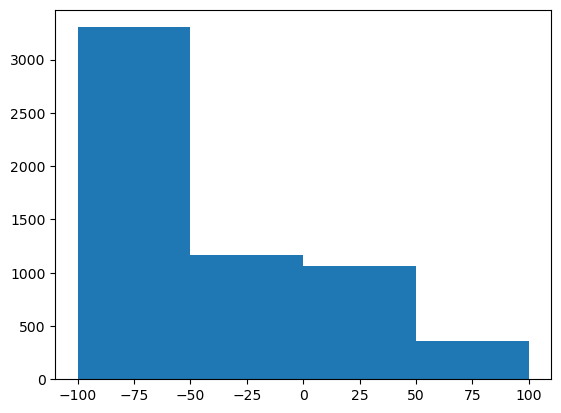

In [24]:
# understand the key metrics
plt.hist(df['ptc_15d'],bins= [-100, -50, 0, 50, 100])

(array([1536.,    0.,    0.,    0.,   63.,  268.,  229.,    0.,  133.,
           0., 1811.,    0.,  156.,  316.,    0.,  557.,  158.,    0.,
           0., 3367.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

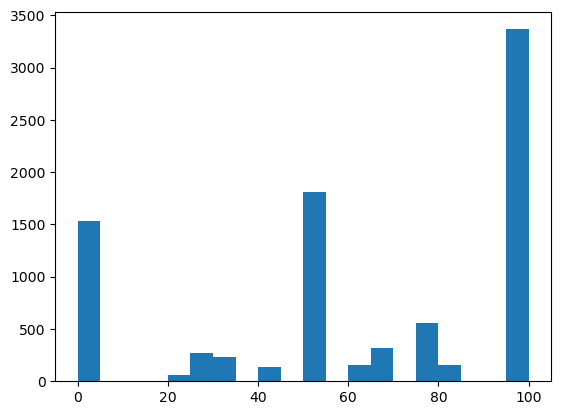

In [25]:
# plt.hist(df['detect_prop_15d'], bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.hist(df['detect_prop_15d'], bins = 20)

(array([4225., 4313.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,   58.]),
 array([  0.  ,  49.95,  99.9 , 149.85, 199.8 , 249.75, 299.7 , 349.65,
        399.6 , 449.55, 499.5 , 549.45, 599.4 , 649.35, 699.3 , 749.25,
        799.2 , 849.15, 899.1 , 949.05, 999.  ]),
 <BarContainer object of 20 artists>)

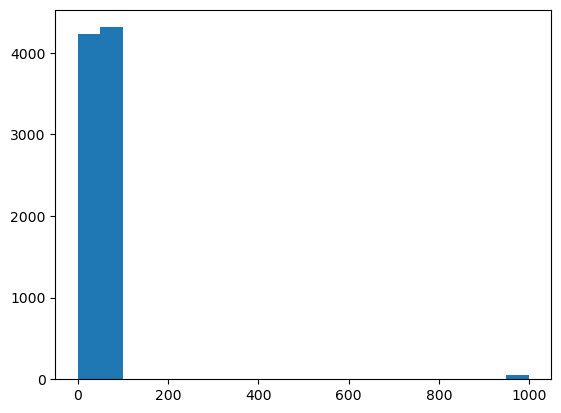

In [26]:
# plt.hist(df['percentile'], bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.hist(df['percentile'], bins= 20)

In [27]:
gb = df.groupby('reporting_jurisdiction', as_index=0).size()
gb

,reporting_jurisdiction,size
0,New York,8642
